In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pickle


In [2]:
df=pd.read_csv("C:\\Users\\Divyanshu\\Desktop\\python\\eda\\extra\\Diabites\\diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.Pregnancies.unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

In [4]:
df.Pregnancies.mean()

3.8450520833333335

In [5]:
df.Pregnancies.std()

3.3695780626988623

In [6]:
upperlimit=df.Pregnancies.mean()+1*df.Pregnancies.std()
upperlimit

7.214630146032196

In [7]:
x=df[(df.Pregnancies<upperlimit)]


In [8]:
x.Pregnancies.unique()

array([6, 1, 0, 5, 3, 2, 4, 7], dtype=int64)

In [9]:
x.drop(['SkinThickness','Insulin','BMI','DiabetesPedigreeFunction'],axis=1,inplace=True)

C:\Users\Divyanshu\AppData\Local\Temp\ipykernel_6632\2301316132.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.drop(['SkinThickness','Insulin','BMI','DiabetesPedigreeFunction'],axis=1,inplace=True)


In [10]:
x

,Pregnancies,Glucose,BloodPressure,Age,Outcome
0,6,148,72,50,1
1,1,85,66,31,0
3,1,89,66,21,0
4,0,137,40,33,1
5,5,116,74,30,0
...,...,...,...,...,...
760,2,88,58,22,0
764,2,122,70,27,0
765,5,121,72,30,0
766,1,126,60,47,1


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB



In [12]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [13]:
X=x.drop('Outcome',axis=1)

In [14]:
y=x.Outcome

In [15]:
X_train, X_test, y_train, y_test =train_test_split(X,y,train_size=0.9,random_state=0)

In [16]:
cross_val_score(RandomForestClassifier(),X_train,y_train,cv=5)

array([0.78448276, 0.72413793, 0.75      , 0.72413793, 0.8       ])

In [17]:
cross_val_score(SVC(),X_train,y_train,cv=5)

array([0.79310345, 0.74137931, 0.79310345, 0.71551724, 0.8       ])

In [18]:
cross_val_score(GaussianNB(),X_train,y_train,cv=5)

array([0.79310345, 0.68103448, 0.76724138, 0.70689655, 0.8       ])

In [19]:
cross_val_score(RandomForestClassifier(n_estimators=20),X_test,y_test,cv=5)

array([0.69230769, 0.84615385, 0.84615385, 0.69230769, 0.69230769])

In [20]:
cross_val_score(SVC(kernel='poly'),X_test,y_test,cv=5)

array([0.76923077, 0.84615385, 0.76923077, 0.69230769, 0.69230769])

In [23]:
reg = RandomForestClassifier()

In [24]:
reg.fit(X_train,y_train)

RandomForestClassifier()

In [25]:
y_pre=reg.predict(X_test)

In [32]:
y_test.head()

759    1
198    1
553    0
371    0
511    0
Name: Outcome, dtype: int64

In [27]:
reg.score(X_test,y_test)


0.7692307692307693

In [28]:
cm=confusion_matrix(y_test,y_pre)

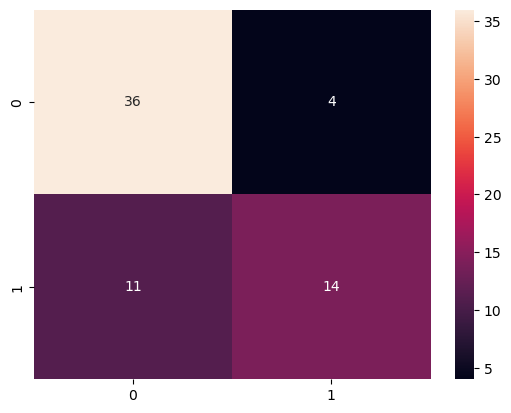

In [29]:
sns.heatmap(cm,annot=True)
plt.show()

In [30]:
with open("diabites.pickle","wb") as f:
    pickle.dump(reg,f)


In [33]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,Age
707,2,127,46,22
26,7,147,76,43
579,2,197,70,62
288,4,96,56,26
273,1,71,78,21
